# Wstęp
Zadanie 10 jest pierwszą częścią zajęć laboratoryjnych poświęconych sieciom rekurencyjnym i predykcji z wykorzystaniem danych multimodalnych. Efektem prac będzie sieć rekurencyjna do predykcji kursu kryptowaluty Bitcoin (BTC) w oparciu o dane z giełdy oraz o wyniki analizy emocji komunikatów z mediów społecznościowych, do których również należy utworzyć dedykowany model sieci rekurencyjnej. Plan realizacji etapów wygląda następująco:

1.   EmoTweet - model sieci rekurencyjnej do analizy emocji (10 pkt., laboratorium 10)
2. Agregacja informacji emotywnej i przygotowanie MultiBTC - multimodalnego model sieci rekurencyjnej do predykcji kursu BTC (10 pkt., laboratorium 11)
3. Ewaluacja modelu MultiBTC (10 pkt., laboratorium 12)

Łącznie można otrzymać 30 punktów.

# Cel ćwiczenia

Celem pierwszego etapu prac jest zapoznanie się z podstawową siecią rekurencyjną LSTM. Ze względu na fakt, że model ten będzie wykorzystany do analizy emocji tekstu, w ramach teorii do zadania zostanie omówiony podstawowy mechanizm konwersji słów w tekście do postaci wektorów dystrybucyjnych (tzw. word embeddings) na podstawie rozwiązania o nazwie `fastText`. Modele będą budowane na ogólnodostępnym zbiorze `TweetEval`, zawierającym podzbiory ręcznie anotowanych tweetów przy pomocy etykiet odnoszących się do następujących zjawisk: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance). 

# Warunki zaliczenia

Do zaliczenia pierwszego etapu należy utworzyć następujące modele dla min. 2 wybranych zjawisk:

1.   Model bazowy (regresja logistyczna).
2.   Model rekurencyjny oparty o sieć LSTM.

Wytrenowane modele będą wykorzystane w 2 etapie, dlatego proszę je zachować.

# Wektory dystrybucyjne

W przetwarzaniu języka naturalnego, o wektorach dystrybucyjnych (inaczej osadzeniach lub zanurzeniach, ang. word embeddings) mówi się w kontekście reprezentacji słów w tekście, zazwyczaj w postaci wektora liczb rzeczywistych, który koduje znaczenie słowa. Hipoteza dystrybucyjna, u podstawy której leży większość metod reprezentacji, mówi o tym, że słowa, które często współwystępują, mają podobne znaczenie. Wektory dystrybucyjne można uzyskać za pomocą zestawu technik modelowania języka, w których słowa lub frazy są mapowane do wektorów liczb rzeczywistych. Z reguły polega to na matematycznym zanurzeniu z przestrzeni o wielu wymiarach opisujących słowo (konteksty) do ciągłej przestrzeni wektorowej o znacznie mniejszym wymiarze.

Metody generowania tego odwzorowania obejmują sieci neuronowe, redukcję wymiarowości na macierzy współwystępowania słów, modele probabilistyczne lub jawną reprezentację w kontekście, w którym pojawiają się słowa. Wektory dystrybucyjne, używane jako podstawowa reprezentacja wejściowa tekstu, okazały się istotnie poprawiać jakość w wielu zadaniach NLP, takich jak np. rozpoznawanie nazw własnych, określanie części mowy, rozpoznawanie dziedziny tekstu, czy też rozpoznawanie wydźwięku i emocji w tekście. 

# fastText

[fastText](https://fasttext.cc/) jest biblioteką do efektywnego uczenia modeli reprezentacji wektorowych słów oraz do budowania klasyfikatorów tekstu. Modele językowe można budować z wykorzystaniem dwóch popularnych technik: [Continuous Bag of Words](https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html) oraz [Skip-Gram](https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c). 

## Instalacja

Pobranie repozytorium projektu:


In [1]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1026/1026), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 3998 (delta 890), reused 859 (delta 826), pack-reused 2972
Receiving objects: 100% (3998/3998), 8.30 MiB | 18.31 MiB/s, done.
Resolving deltas: 100% (2528/2528), done.
Updating files: 100% (520/520), done.


Instalacja biblioteki:

In [1]:
!cd fastText && mkdir build && cd build && cmake ..  && make && make install

mkdir: build: File exists


Instalacja API do Pythona:

In [2]:
!cd fastText && pip install .

Processing /Users/stefan/coding/pwr-ai/NNs/btc-price-pred/fastText
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl (20.3 MB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp312-cp312-macosx_10_16_x86_64.whl size=315058 sha256=4efda8e84decf374e5d981b7cf9e7990e4f75819343526582f52a3da12066c9b
  Stored in directory: /private/var/folders/cw/3q5ykvvj1031m_07d0vbll1m0000gr/T/pip-ephem-wheel-cache-vk703tui/wheels/d4/67/84/daa13f7e04b51a4de5205736e9336fac037cbbc293dc225036
Successfully built fasttext


# Dane do etapu nr 1

## Korpus 
Korpus (zbiór dokumentów) do realizacji etapu nr 1 pochodzi z repozytorium [TweetEval](https://github.com/cardiffnlp/tweeteval). Repozytorium zawiera 7 różnorodnych zbiorów danych, zawierających zanonimizowane wpisy z [Twittera](https://twitter.com), anotowane następującymi zjawiskami: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance). 

In [3]:
# należy wgrać plik z katalogu "dane" o nazwie tweeteval.7z

In [4]:
!7za x tweeteval.7z

zsh:1: command not found: 7za


## Zawartość korpusu

W katalogu głównym (tweeteval) znajdują się następujące elementy:
*   `datasets` - katalog ze zbiorami danych
   * `emotion` - tweety anotowane emocjami 
     * `mapping.txt` - identyfikatory etykiet oraz ich opis
     * `train_text.txt` - wpisy z Twittera (część ucząca)
     * `train_labels.txt` - etykiety wpisów z Twittera (część ucząca)
     * `test_*.txt, valid_*.txt` - j.w. (część testowa i walidacyjna)
   * `emoji` - tweety anotowane emotikonami
   * `...` - katalogi zawierające tweety anotowane pozostałymi zjawiskami
*   `predictions` - katalog z przykładowymi predykcjami
   * `emotion.txt` - etykiety modelu predykcyjnego dla części testowej danych `emotion`
   * `emoji.txt` - j.w. dla cz. testowej danych `emoji`
   * `...` - j.w. dla pozostałych danych
*   `evaluation_script.py` - skrypt do ewaluacji 

## Model języka

Na potrzeby zadania został przygotowany model Skip-Gram reprezentacji wektorowej słów, zbudowany na wielkim korpusie tweetów dotyczących kursu BTC. Wersja binarna tego modelu dostępna jest w 2 wariantach:
* wektory 100-elementowe (1.7GB, fasttext_tweetmodel_btc_sg_100_en.bin)
* wektory 20-elementowe (350MB, fasttext_tweetmodel_btc_sg_20_en.bin)

Na potrzeby prezentacji przykładowego rozwiązania zostanie wykorzystany mniejszy model. Do realizacji ostatecznego rozwiązania należy wykorzystać większy model. 



# Model bazowy rozpoznawania emocji

Model bazowy, zbudowany z wykorzystaniem narzędzia fastText (oparty o regresję logistyczną), będzie punktem wyjścia do porównania się z modelami opartymi o sieci LSTM, których skonstruowanie i ewaluacja na wybranych zadaniach będzie celem etapu nr 1. 

Pobranie mniejszego modelu reprezentacji języka tweetów:


In [5]:
# należy wgrać plik z katalogu "dane" o nazwie fasttext_tweetmodel_btc_sg_20_en.bin

Wydobycie słownika wektorów z binarnego modelu języka:

In [21]:
!python fastText/python/doc/examples/bin_to_vec.py fasttext_tweetmodel_btc_sg_20_en.bin > fasttext_tweetmodel_btc_sg_20_en.vec

Dodanie prefiksu `__label__` do etykiet zbioru `emotion`:

In [49]:
!sed 's/^/__label__/g' tweeteval/datasets/emotion/train_labels.txt > data/train_labels_emo.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/test_labels.txt > data/test_labels_emo.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/val_labels.txt > data/val_labels_emo.txt

Przygotowanie zbioru uczącego, testowego i walidacyjnego w formacie `fastText`:

In [43]:
!paste -d " " tweeteval/datasets/emotion/train_text.txt train_labels_emo.txt > train_emo.txt
!paste -d " " tweeteval/datasets/emotion/test_text.txt test_labels_emo.txt > test_emo.txt
!paste -d " " tweeteval/datasets/emotion/val_text.txt val_labels_emo.txt > val_emo.txt

paste: train_labels_emo.txt: No such file or directory
paste: test_labels_emo.txt: No such file or directory
paste: val_labels_emo.txt: No such file or directory


Trenowanie modelu z wykorzystaniem wejścia `train_emo.txt`, z określeniem wyjściowej nazwy modelu `emo_model`, dla wektorów słów o wymiarze `20`, z wykorzystaniem pretrenowanych wektorów z pliku `fasttext_tweetmodel_btc_sg_20_en.vec` i z uruchomieniem dostrajania hiperparametrów na zbiorze walidacyjnym `val_emo.txt`:

In [24]:
!fasttext supervised -input train_emo.txt -output emo_model -dim 20 -pretrainedVectors fasttext_tweetmodel_btc_sg_20_en.vec -autotune-validation val_emo.txt 

Progress: 100.0% Trials:   26 Best score:  0.681818 ETA:   0h 0m 0s% Trials:    1 Best score:   unknown ETA:   0h 4m56s Trials:    3 Best score:  0.606952 ETA:   0h 4m38s Trials:    4 Best score:  0.679144 ETA:   0h 4m27s13.3% Trials:    5 Best score:  0.679144 ETA:   0h 4m20s ETA:   0h 4m15s ETA:   0h 4m10s22.2% Trials:    7 Best score:  0.679144 ETA:   0h 3m53s% Trials:    8 Best score:  0.679144 ETA:   0h 3m45s31.7% Trials:   11 Best score:  0.679144 ETA:   0h 3m24s11 Best score:  0.679144 ETA:   0h 3m23s35.6% Trials:   12 Best score:  0.679144 ETA:   0h 3m13s 45.3% Trials:   14 Best score:  0.679144 ETA:   0h 2m44s16 Best score:  0.679144 ETA:   0h 2m23s52.7% Trials:   16 Best score:  0.679144 ETA:   0h 2m21s59.6% Trials:   18 Best score:  0.679144 ETA:   0h 2m 1s60.4% Trials:   18 Best score:  0.679144 ETA:   0h 1m58s 0.679144 ETA:   0h 1m42s  21 Best score:  0.681818 ETA:   0h 1m32s  23 Best score:  0.681818 ETA:   0h 1m 9s92.0% Trials:   24 Best score:  0.681818 ETA:   0h 0m24s9

Podstawowa ewaluacja modelu z wykorzystaniem `fastText`, wynikiem jest precyzja (P - precision) i kompletność (R - recall) w wariancie [weighted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).

In [25]:
!fasttext test emo_model.bin test_emo.txt

N	1421
P@1	0.698
R@1	0.698


In [57]:
def get_f1(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

get_f1(0.698, 0.698)

0.698

Rozszerzona ewaluacja modelu z wykorzystaniem `fastText`, wynikiem jest precyzja (P - precision), kompletność (R - recall) oraz F1-score dla każdej etykiety w wariancie [weighted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).

In [26]:
!fasttext test-label emo_model.bin test_emo.txt

F1-Score : 0.773570  Precision : 0.702782  Recall : 0.860215   __label__0
F1-Score : 0.682477  Precision : 0.687003  Recall : 0.678010   __label__3
F1-Score : 0.658346  Precision : 0.745583  Recall : 0.589385   __label__1
F1-Score : 0.417910  Precision : 0.538462  Recall : 0.341463   __label__2
N	1421
P@1	0.698
R@1	0.698


Przygotowanie danych do ewaluacji z wykorzystaniem skryptu dołączonego do zbioru TweetEval:

In [27]:
!mkdir predictions2

mkdir: predictions2: File exists


In [153]:
!fasttext predict emo_model.bin tweeteval/datasets/emotion/test_text.txt | sed 's/__label__//g' > predictions2/emotion.txt

Uruchomienie ewaluacji. Oprócz wyników P, R, F1 [weighted]((https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)) dla każdej etykiety, otrzymujemy również wyniki w wariancie [macro]((https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)). **Ostateczną miarą (TweetEval Score) jest miara F1-score w wariancie macro i tę miarę proszę traktować jako kluczową przy porównywaniu rozwiązań.**

In [154]:
!python tweeteval/evaluation_script.py --tweeteval_path tweeteval/datasets --predictions_path predictions2 --task emotion

0 {'precision': 0.7027818448023426, 'recall': 0.8602150537634409, 'f1-score': 0.7735697018533441, 'support': 558.0}
1 {'precision': 0.7455830388692579, 'recall': 0.5893854748603352, 'f1-score': 0.6583463338533542, 'support': 358.0}
2 {'precision': 0.5384615384615384, 'recall': 0.34146341463414637, 'f1-score': 0.417910447761194, 'support': 123.0}
3 {'precision': 0.6870026525198939, 'recall': 0.6780104712041884, 'f1-score': 0.6824769433465085, 'support': 382.0}
accuracy 0.6980999296270233
macro avg {'precision': 0.6684572686632582, 'recall': 0.6172686036155277, 'f1-score': 0.6330758567036001, 'support': 1421.0}
weighted avg {'precision': 0.6950997746715484, 'recall': 0.6980999296270233, 'f1-score': 0.6892674585409287, 'support': 1421.0}
------------------------------
TweetEval Score (emotion): 0.6330758567036001


# Budowa modeli EmoTweet

W tej sekcji Państwa zadaniem będzie przygotowanie modeli sieci LSTM oraz modeli bazowych opartych o regresję logistyczną (fastText) dla wybranych 2 zjawisk ze zbioru TweetEval. Dla sieci LSTM kolejne jednostki sieci rekurencyjnej na wejściu dostają reprezentację wektorową kolejnych wyrazów w tekście. Wyjście z ostatniej jednostki podlega klasyfikacji. W celu usprawnienia zadania, przedstawiona zostanie metoda reprezentacji wektorowej tekstu z wykorzystaniem Pythonowego API do narzędzia fastText. Do ewaluacji modeli należy wykorzystać uprzednio zaprezentowany skrypt `tweeteval/evaluation_script.py`.

## Wektoryzacja tekstu


In [1]:
# inicjalizacja biblioteki
import fasttext

In [16]:
# ładowanie modelu
MODEL_PATH = 'models/fasttext_tweetmodel_btc_sg_20_en.bin'
model = fasttext.load_model(MODEL_PATH)

In [159]:
# wczytanie danych treningowych
import pandas as pd
TRAIN_PATH = 'tweeteval/datasets/emotion/train_text.txt'
train_texts = pd.read_csv(TRAIN_PATH, sep='\t', header=None)
train_texts

,0
0,“Worry is a down payment on a problem you may ...
1,My roommate: it's okay that we can't spell bec...
2,No but that's so cute. Atsu was probably shy a...
3,Rooneys fucking untouchable isn't he? Been fuc...
4,it's pretty depressing when u hit pan on ur fa...
...,...
3252,I get discouraged because I try for 5 fucking ...
3253,The @user are in contention and hosting @user ...
3254,@user @user @user @user @user as a fellow UP g...
3255,You have a #problem? Yes! Can you do #somethin...


In [160]:
# wektoryzacja pierwszego tekstu
first_text = train_texts[0][0]
for word in fasttext.tokenize(first_text):
  print(word, model.get_word_id(word), model.get_word_vector(word))

“Worry -1 [-0.04189867  0.15429688  0.96717507  1.3809655   0.49123076 -0.5447607
 -0.11276884  0.20356484 -1.0640966  -1.6616327   0.03930127 -0.7224096
  0.21334486 -0.5872285   0.2898182   0.81751084 -1.6077403   1.8038087
  0.4850348   1.0643197 ]
is 6 [ 0.24099417  0.13544752  0.7251924   0.32544732  0.27421224  0.31903243
  0.7501186   0.22853182 -0.91543657  0.08587569  0.13866538 -0.38624704
 -0.30637258  0.13666666 -0.43992838 -0.12443608 -1.0383893  -0.06567164
  0.17007533 -0.16708991]
a 7 [-0.00810981 -0.03934941  0.81658655  0.56301105  0.43812367  0.29547286
  0.4691784   0.07483605 -0.58705056  0.28240088 -0.6339584  -0.16187707
 -0.23376046 -0.1245347   0.03071329 -0.07603034 -0.9066614  -0.07007706
  0.4522892  -0.15033531]
down 174 [ 0.9175071  -1.0815151   0.07119758  0.34226617  0.9607946   0.5973182
  0.91058624 -0.32068744 -0.72137564  1.2241784  -0.1882128  -0.23591968
 -0.02596712 -0.10194965 -0.09553405  0.36303622  0.22354192  0.4901933
  0.5405883   0.5965071

Proszę zwrócić uwagę, że fastText jest w stanie przyporządkować reprezentację wektorową nawet dla takich słów, których model języka nie widział w trakcie uczenia (pierwszy token wejściowego tekstu). 

In [18]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
# nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stefan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = set(stopwords.words('english'))

## Model klasyfikacji tekstu LSTM (2 pkt.)

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMClassifier(nn.Module):
    def __init__(self, input_size: int, hidden_dim: int, output_size: int, num_layers=2):
        super().__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_size, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.output = nn.Linear(in_features=hidden_dim * 2, out_features=output_size)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim)
        h, _ = self.lstm(x, (h0, c0))
        h = self.dropout(h[:,-1:].squeeze(dim=1))
        y = self.output(h)
        return y

lstm_emotions = LSTMClassifier(input_size=20, hidden_dim=64, output_size=4)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_emotions.parameters(), lr=0.01)

### **obsługa danych**

**wektoryzacja**

In [10]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def pad_vector(vector, max_length, vector_size):
    if len(vector) > max_length:
        return vector[:max_length]  # Truncate if longer than max_length
    else:
        padding = np.zeros((max_length - len(vector), vector_size))
        return np.vstack((vector, padding))


def vectorize_text(sentence, model, vectors_length, to_tensor:bool=True):
    vectors = []
    for word in fasttext.tokenize(sentence):
        if word not in stop_words:
            vectors.append(model.get_word_vector(word))
    padded_vector = pad_vector(np.stack(vectors), max_length=vectors_length, vector_size=len(vectors[0]))
    if to_tensor:
        padded_vector = torch.tensor(padded_vector, dtype=torch.float32)
    return padded_vector

def scale_vectors(vectors, scaler=None):
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(vectors)
    
    standardized_vectors_np = scaler.transform(vectors)
    standardized_vectors = torch.tensor(standardized_vectors_np, dtype=torch.float32)
    return standardized_vectors, scaler

In [11]:
df_emotion_labels = pd.read_csv("tweeteval/datasets/emotion/train_labels.txt", names=["y"])

**tworzenie *Datasetów* i *Dataloaderów***

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]
        if self.transform:
            x = self.transform(x)
        return x, y

In [20]:
import os

def get_dataloaders(folder, splits:list=["train", "test"], batch_size:int=32, vector_length:int=32):
    loaders = []
    scaler = None
    folder_path = f"tweeteval/datasets/{folder}"
    for split in splits:
        texts_path = os.path.join(folder_path, f"{split}_text.txt")
        labels_path = os.path.join(folder_path, f"{split}_labels.txt")
        df_texts = pd.read_csv(texts_path, sep="\t", names=["x"])
        df_labels = pd.read_csv(labels_path, names=["y"])
        if not len(df_texts) == len(df_labels):
            with open(texts_path, 'r') as file_:
                sentences = file_.readlines()
                df_texts = pd.DataFrame(data=sentences, columns=["x"])
        assert len(df_texts) == len(df_labels), "Invalid files, different number of atributes and labels.😢"

        sent_vectors = [vectorize_text(t, model, vector_length) for t in df_texts["x"].values]
        # standardized_vectors, scaler = scale_vectors(sent_vectors, scaler)
        standardized_vectors_tensor = torch.tensor(np.array(sent_vectors), dtype=torch.float32).to(device)

        dataset = CustomDataset(standardized_vectors_tensor, df_labels["y"].to_list())
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        loaders.append(dataloader)
    
    return loaders

## Trenowanie modeli LSTM dla ZJAWISKO_1 i ZJAWISKO_2 (2 pkt.)
Należy wybrać 2 z 7 dostępnych podzbiorów z [TweetEval](https://github.com/cardiffnlp/tweeteval) anotowanych następującymi zjawiskami: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).

In [103]:
# from torch.utils.tensorboard import SummaryWriter

# log_dir = 'logs/'
# os.makedirs(log_dir, exist_ok=True)
# writer = SummaryWriter(log_dir)

### **ZJAWISKO_1** - emocje (ang. *emotion*)

In [199]:
emo_train_dataloader, emo_test_dataloader = get_dataloaders("emotion", batch_size=32, vector_length=12)

In [200]:
for x, y in emo_train_dataloader:
    print(x.shape, y.shape)
    break

torch.Size([32, 12, 20]) torch.Size([32])


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_lstm(lstm, dataloader, loss_fn):
    results = {
        "loss": 0, "acc": 0, "f1": 0, "precision": 0, "recall": 0
    }
    with torch.no_grad():
        epoch_loss = 0
        all_preds = []
        all_labels = []
        
        for X, y_true in tqdm(dataloader):
            y_pred = lstm.forward(X)
            loss = loss_fn(y_pred, y_true)
            epoch_loss += loss.item()
            _, predicted = torch.max(y_pred, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_true.cpu().numpy())
        
        accuracy = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='weighted')
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        
        results['loss'] = epoch_loss / len(dataloader)
        results['acc'] = accuracy
        results['f1'] = f1
        results['precision'] = precision
        results['recall'] = recall
    
    return results


def train(model, optimizer, loss_fn, train_dataloader, test_dataloader, epochs, save_path: str, model_tag: str):
    results = {
        "loss": [], "acc": [], "f1": [], "test_loss": [], "test_acc": [], "test_f1": []
    }
    best_f1 = 0.0
    best_model = None
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        all_preds = []
        all_labels = []
        
        for X, y_true in tqdm(train_dataloader):
            optimizer.zero_grad()
            y_pred = model.forward(X)
            loss = loss_fn(y_pred, y_true)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            _, predicted = torch.max(y_pred, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_true.cpu().numpy())
        
        accuracy = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='weighted')
        results["loss"].append(epoch_loss / len(train_dataloader))
        results["acc"].append(accuracy)
        results["f1"].append(f1)

        test_results = evaluate_lstm(model, test_dataloader, loss_fn)
        results["test_loss"].append(test_results["loss"])
        results["test_acc"].append(test_results["acc"])
        results["test_f1"].append(test_results["f1"])
        
        if test_results["f1"] > best_f1:
            best_f1 = test_results["f1"]
            best_model = model.state_dict()
        
        print(f'Epoch [{epoch+1}/{epochs}]\n🏋️TRAIN -- Loss: {epoch_loss:.3f}, Accuracy: {accuracy:.3f}, F1 Score: {f1:.3f}')
        print(f"🧪TEST -- Loss: {test_results["loss"]:.3f}, Accuracy: {test_results["acc"]:.3f}, F1 Score: {test_results["f1"]:.3f}")

    torch.save(best_model, save_path)
    print(f"Best model saved to: {save_path}")
    return results, test_results


def plot_learning_curve(results):
    epochs = range(1, len(results["loss"]) + 1)
    data = pd.DataFrame({
        'Epoch': epochs,
        'Loss': results['loss'],
        'Accuracy': results['acc'],
        'F1 Score': results['f1'],
        'Test Loss': results['test_loss'],
        'Test Accuracy': results['test_acc'],
        'Test F1 Score': results['test_f1']
    })
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 7))
    
    plt.subplot(1, 3, 1)
    sns.lineplot(x='Epoch', y='Loss', data=data, label='Train Loss')
    sns.lineplot(x='Epoch', y='Test Loss', data=data, label='Test Loss')
    plt.title('Loss vs. Epochs')
    
    plt.subplot(1, 3, 2)
    sns.lineplot(x='Epoch', y='Accuracy', data=data, label='Train Accuracy')
    sns.lineplot(x='Epoch', y='Test Accuracy', data=data, label='Test Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    sns.lineplot(x='Epoch', y='F1 Score', data=data, label='Train F1 Score')
    sns.lineplot(x='Epoch', y='Test F1 Score', data=data, label='Test F1 Score')
    plt.title('F1 Score vs. Epochs')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [216]:
results, test_results = train(
    lstm_emotions,
    optimizer,
    loss_function,
    train_dataloader=emo_train_dataloader,
    test_dataloader=emo_test_dataloader,
    epochs=30,
    save_path="models/lstm_emotions_2.pt",
    model_tag="LSTM_emotions")

100%|██████████| 45/45 [00:00<00:00, 296.01it/s]
/Users/stefan/coding/pwr-ai/NNs/btc-price-pred/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/30]
🏋️TRAIN -- Loss: 127.228, Accuracy: 0.436, F1 Score: 0.335
🧪TEST -- Loss: 1.310, Accuracy: 0.395, F1 Score: 0.227


100%|██████████| 45/45 [00:00<00:00, 283.93it/s]


Epoch [2/30]
🏋️TRAIN -- Loss: 123.060, Accuracy: 0.470, F1 Score: 0.369
🧪TEST -- Loss: 1.153, Accuracy: 0.482, F1 Score: 0.381


100%|██████████| 45/45 [00:00<00:00, 333.64it/s]


Epoch [3/30]
🏋️TRAIN -- Loss: 115.744, Accuracy: 0.493, F1 Score: 0.448
🧪TEST -- Loss: 1.202, Accuracy: 0.459, F1 Score: 0.358


100%|██████████| 45/45 [00:00<00:00, 351.13it/s]


Epoch [4/30]
🏋️TRAIN -- Loss: 108.587, Accuracy: 0.535, F1 Score: 0.509
🧪TEST -- Loss: 1.130, Accuracy: 0.502, F1 Score: 0.442


100%|██████████| 45/45 [00:00<00:00, 211.64it/s]


Epoch [5/30]
🏋️TRAIN -- Loss: 106.261, Accuracy: 0.540, F1 Score: 0.517
🧪TEST -- Loss: 1.099, Accuracy: 0.527, F1 Score: 0.521


100%|██████████| 45/45 [00:00<00:00, 332.01it/s]


Epoch [6/30]
🏋️TRAIN -- Loss: 102.869, Accuracy: 0.566, F1 Score: 0.552
🧪TEST -- Loss: 1.065, Accuracy: 0.548, F1 Score: 0.548


100%|██████████| 45/45 [00:00<00:00, 340.87it/s]


Epoch [7/30]
🏋️TRAIN -- Loss: 99.000, Accuracy: 0.586, F1 Score: 0.572
🧪TEST -- Loss: 1.061, Accuracy: 0.564, F1 Score: 0.548


100%|██████████| 45/45 [00:00<00:00, 348.02it/s]


Epoch [8/30]
🏋️TRAIN -- Loss: 94.830, Accuracy: 0.616, F1 Score: 0.605
🧪TEST -- Loss: 1.080, Accuracy: 0.538, F1 Score: 0.532


100%|██████████| 45/45 [00:00<00:00, 299.65it/s]


Epoch [9/30]
🏋️TRAIN -- Loss: 90.010, Accuracy: 0.631, F1 Score: 0.625
🧪TEST -- Loss: 1.100, Accuracy: 0.561, F1 Score: 0.533


100%|██████████| 45/45 [00:00<00:00, 366.94it/s]


Epoch [10/30]
🏋️TRAIN -- Loss: 85.999, Accuracy: 0.656, F1 Score: 0.650
🧪TEST -- Loss: 1.152, Accuracy: 0.559, F1 Score: 0.533


100%|██████████| 45/45 [00:00<00:00, 337.27it/s]


Epoch [11/30]
🏋️TRAIN -- Loss: 80.871, Accuracy: 0.671, F1 Score: 0.665
🧪TEST -- Loss: 1.140, Accuracy: 0.556, F1 Score: 0.535


100%|██████████| 45/45 [00:00<00:00, 326.61it/s]


Epoch [12/30]
🏋️TRAIN -- Loss: 75.860, Accuracy: 0.699, F1 Score: 0.694
🧪TEST -- Loss: 1.117, Accuracy: 0.573, F1 Score: 0.558


100%|██████████| 45/45 [00:00<00:00, 304.54it/s]


Epoch [13/30]
🏋️TRAIN -- Loss: 71.310, Accuracy: 0.718, F1 Score: 0.715
🧪TEST -- Loss: 1.192, Accuracy: 0.540, F1 Score: 0.538


100%|██████████| 45/45 [00:00<00:00, 338.60it/s]


Epoch [14/30]
🏋️TRAIN -- Loss: 64.275, Accuracy: 0.749, F1 Score: 0.747
🧪TEST -- Loss: 1.402, Accuracy: 0.548, F1 Score: 0.527


100%|██████████| 45/45 [00:00<00:00, 309.48it/s]


Epoch [15/30]
🏋️TRAIN -- Loss: 62.527, Accuracy: 0.749, F1 Score: 0.748
🧪TEST -- Loss: 1.354, Accuracy: 0.552, F1 Score: 0.540


100%|██████████| 45/45 [00:00<00:00, 280.05it/s]


Epoch [16/30]
🏋️TRAIN -- Loss: 54.402, Accuracy: 0.790, F1 Score: 0.789
🧪TEST -- Loss: 1.548, Accuracy: 0.526, F1 Score: 0.521


100%|██████████| 45/45 [00:00<00:00, 239.36it/s]


Epoch [17/30]
🏋️TRAIN -- Loss: 50.431, Accuracy: 0.808, F1 Score: 0.807
🧪TEST -- Loss: 1.675, Accuracy: 0.543, F1 Score: 0.538


100%|██████████| 45/45 [00:00<00:00, 329.92it/s]


Epoch [18/30]
🏋️TRAIN -- Loss: 44.684, Accuracy: 0.833, F1 Score: 0.833
🧪TEST -- Loss: 1.822, Accuracy: 0.512, F1 Score: 0.518


100%|██████████| 45/45 [00:00<00:00, 309.87it/s]


Epoch [19/30]
🏋️TRAIN -- Loss: 41.104, Accuracy: 0.847, F1 Score: 0.847
🧪TEST -- Loss: 1.955, Accuracy: 0.493, F1 Score: 0.499


100%|██████████| 45/45 [00:00<00:00, 340.74it/s]


Epoch [20/30]
🏋️TRAIN -- Loss: 42.045, Accuracy: 0.846, F1 Score: 0.845
🧪TEST -- Loss: 1.915, Accuracy: 0.530, F1 Score: 0.535


100%|██████████| 45/45 [00:00<00:00, 348.42it/s]


Epoch [21/30]
🏋️TRAIN -- Loss: 33.661, Accuracy: 0.877, F1 Score: 0.877
🧪TEST -- Loss: 1.960, Accuracy: 0.526, F1 Score: 0.526


100%|██████████| 45/45 [00:00<00:00, 325.83it/s]


Epoch [22/30]
🏋️TRAIN -- Loss: 32.997, Accuracy: 0.880, F1 Score: 0.880
🧪TEST -- Loss: 2.084, Accuracy: 0.519, F1 Score: 0.520


100%|██████████| 45/45 [00:00<00:00, 292.93it/s]


Epoch [23/30]
🏋️TRAIN -- Loss: 27.664, Accuracy: 0.900, F1 Score: 0.900
🧪TEST -- Loss: 2.057, Accuracy: 0.505, F1 Score: 0.509


100%|██████████| 45/45 [00:00<00:00, 330.23it/s]


Epoch [24/30]
🏋️TRAIN -- Loss: 30.040, Accuracy: 0.892, F1 Score: 0.892
🧪TEST -- Loss: 2.220, Accuracy: 0.528, F1 Score: 0.516


100%|██████████| 45/45 [00:00<00:00, 318.96it/s]


Epoch [25/30]
🏋️TRAIN -- Loss: 22.926, Accuracy: 0.918, F1 Score: 0.918
🧪TEST -- Loss: 2.367, Accuracy: 0.517, F1 Score: 0.510


100%|██████████| 45/45 [00:00<00:00, 289.85it/s]


Epoch [26/30]
🏋️TRAIN -- Loss: 22.871, Accuracy: 0.917, F1 Score: 0.917
🧪TEST -- Loss: 2.470, Accuracy: 0.526, F1 Score: 0.533


100%|██████████| 45/45 [00:00<00:00, 304.49it/s]


Epoch [27/30]
🏋️TRAIN -- Loss: 21.480, Accuracy: 0.925, F1 Score: 0.925
🧪TEST -- Loss: 2.291, Accuracy: 0.512, F1 Score: 0.516


100%|██████████| 45/45 [00:00<00:00, 301.91it/s]


Epoch [28/30]
🏋️TRAIN -- Loss: 20.505, Accuracy: 0.931, F1 Score: 0.931
🧪TEST -- Loss: 2.806, Accuracy: 0.519, F1 Score: 0.517


100%|██████████| 45/45 [00:00<00:00, 323.86it/s]


Epoch [29/30]
🏋️TRAIN -- Loss: 21.271, Accuracy: 0.921, F1 Score: 0.921
🧪TEST -- Loss: 2.408, Accuracy: 0.515, F1 Score: 0.513


100%|██████████| 45/45 [00:00<00:00, 329.20it/s]


Epoch [30/30]
🏋️TRAIN -- Loss: 15.186, Accuracy: 0.948, F1 Score: 0.948
🧪TEST -- Loss: 2.915, Accuracy: 0.526, F1 Score: 0.518
Best model saved to: models/lstm_emotions_2.pt


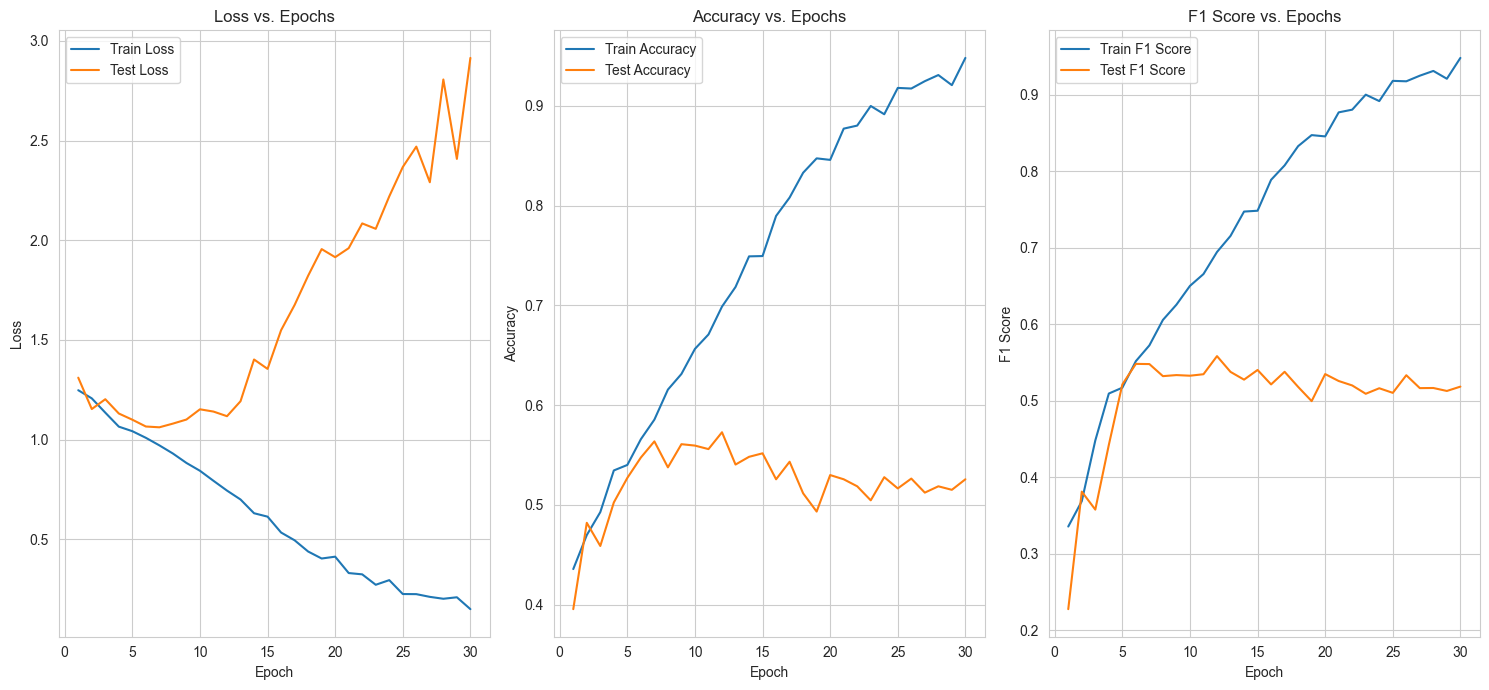

In [217]:
plot_learning_curve(results)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir $log_dir

### **ZJAWISKO_2** - agresja (ang. *offensive*)

In [113]:
import torch
import pandas as pd

In [114]:
off_train_dataloader, off_test_dataloader = get_dataloaders("offensive")

100%|██████████| 7/7 [00:00<00:00, 143.20it/s]


Epoch [1/20]
🏋️TRAIN -- Loss: 56.050, Accuracy: 0.678, F1 Score: 0.628
🧪TEST -- Loss: 0.536, Accuracy: 0.741, F1 Score: 0.680


100%|██████████| 7/7 [00:00<00:00, 144.39it/s]


Epoch [2/20]
🏋️TRAIN -- Loss: 54.522, Accuracy: 0.690, F1 Score: 0.644
🧪TEST -- Loss: 0.522, Accuracy: 0.745, F1 Score: 0.695


100%|██████████| 7/7 [00:00<00:00, 127.60it/s]


Epoch [3/20]
🏋️TRAIN -- Loss: 54.000, Accuracy: 0.693, F1 Score: 0.650
🧪TEST -- Loss: 0.529, Accuracy: 0.745, F1 Score: 0.695


100%|██████████| 7/7 [00:00<00:00, 161.27it/s]


Epoch [4/20]
🏋️TRAIN -- Loss: 53.519, Accuracy: 0.698, F1 Score: 0.654
🧪TEST -- Loss: 0.521, Accuracy: 0.735, F1 Score: 0.668


100%|██████████| 7/7 [00:00<00:00, 141.90it/s]


Epoch [5/20]
🏋️TRAIN -- Loss: 53.258, Accuracy: 0.701, F1 Score: 0.663
🧪TEST -- Loss: 0.542, Accuracy: 0.736, F1 Score: 0.678


100%|██████████| 7/7 [00:00<00:00, 133.80it/s]


Epoch [6/20]
🏋️TRAIN -- Loss: 52.326, Accuracy: 0.708, F1 Score: 0.671
🧪TEST -- Loss: 0.537, Accuracy: 0.733, F1 Score: 0.672


100%|██████████| 7/7 [00:00<00:00, 161.03it/s]


Epoch [7/20]
🏋️TRAIN -- Loss: 51.801, Accuracy: 0.708, F1 Score: 0.673
🧪TEST -- Loss: 0.524, Accuracy: 0.741, F1 Score: 0.688


100%|██████████| 7/7 [00:00<00:00, 163.36it/s]


Epoch [8/20]
🏋️TRAIN -- Loss: 51.976, Accuracy: 0.704, F1 Score: 0.669
🧪TEST -- Loss: 0.549, Accuracy: 0.734, F1 Score: 0.680


100%|██████████| 7/7 [00:00<00:00, 155.07it/s]


Epoch [9/20]
🏋️TRAIN -- Loss: 51.317, Accuracy: 0.711, F1 Score: 0.682
🧪TEST -- Loss: 0.529, Accuracy: 0.736, F1 Score: 0.684


100%|██████████| 7/7 [00:00<00:00, 154.22it/s]


Epoch [10/20]
🏋️TRAIN -- Loss: 50.840, Accuracy: 0.714, F1 Score: 0.683
🧪TEST -- Loss: 0.534, Accuracy: 0.734, F1 Score: 0.685


100%|██████████| 7/7 [00:00<00:00, 106.13it/s]


Epoch [11/20]
🏋️TRAIN -- Loss: 50.671, Accuracy: 0.716, F1 Score: 0.688
🧪TEST -- Loss: 0.544, Accuracy: 0.745, F1 Score: 0.682


100%|██████████| 7/7 [00:00<00:00, 113.33it/s]


Epoch [12/20]
🏋️TRAIN -- Loss: 49.738, Accuracy: 0.718, F1 Score: 0.693
🧪TEST -- Loss: 0.559, Accuracy: 0.758, F1 Score: 0.715


100%|██████████| 7/7 [00:00<00:00, 127.17it/s]


Epoch [13/20]
🏋️TRAIN -- Loss: 49.628, Accuracy: 0.722, F1 Score: 0.697
🧪TEST -- Loss: 0.551, Accuracy: 0.730, F1 Score: 0.683


100%|██████████| 7/7 [00:00<00:00, 120.24it/s]


Epoch [14/20]
🏋️TRAIN -- Loss: 49.149, Accuracy: 0.724, F1 Score: 0.699
🧪TEST -- Loss: 0.571, Accuracy: 0.741, F1 Score: 0.701


100%|██████████| 7/7 [00:00<00:00, 93.91it/s]


Epoch [15/20]
🏋️TRAIN -- Loss: 48.261, Accuracy: 0.728, F1 Score: 0.707
🧪TEST -- Loss: 0.569, Accuracy: 0.733, F1 Score: 0.686


100%|██████████| 7/7 [00:00<00:00, 108.86it/s]


Epoch [16/20]
🏋️TRAIN -- Loss: 47.690, Accuracy: 0.732, F1 Score: 0.711
🧪TEST -- Loss: 0.580, Accuracy: 0.752, F1 Score: 0.725


100%|██████████| 7/7 [00:00<00:00, 93.31it/s]


Epoch [17/20]
🏋️TRAIN -- Loss: 47.143, Accuracy: 0.733, F1 Score: 0.714
🧪TEST -- Loss: 0.610, Accuracy: 0.734, F1 Score: 0.697


100%|██████████| 7/7 [00:00<00:00, 76.34it/s]


Epoch [18/20]
🏋️TRAIN -- Loss: 46.456, Accuracy: 0.739, F1 Score: 0.720
🧪TEST -- Loss: 0.615, Accuracy: 0.742, F1 Score: 0.697


100%|██████████| 7/7 [00:00<00:00, 90.85it/s]


Epoch [19/20]
🏋️TRAIN -- Loss: 46.014, Accuracy: 0.740, F1 Score: 0.722
🧪TEST -- Loss: 0.642, Accuracy: 0.722, F1 Score: 0.670


100%|██████████| 7/7 [00:00<00:00, 80.86it/s]


Epoch [20/20]
🏋️TRAIN -- Loss: 45.646, Accuracy: 0.746, F1 Score: 0.729
🧪TEST -- Loss: 0.633, Accuracy: 0.733, F1 Score: 0.699
Best model saved to: models/lstm_offensive.pt


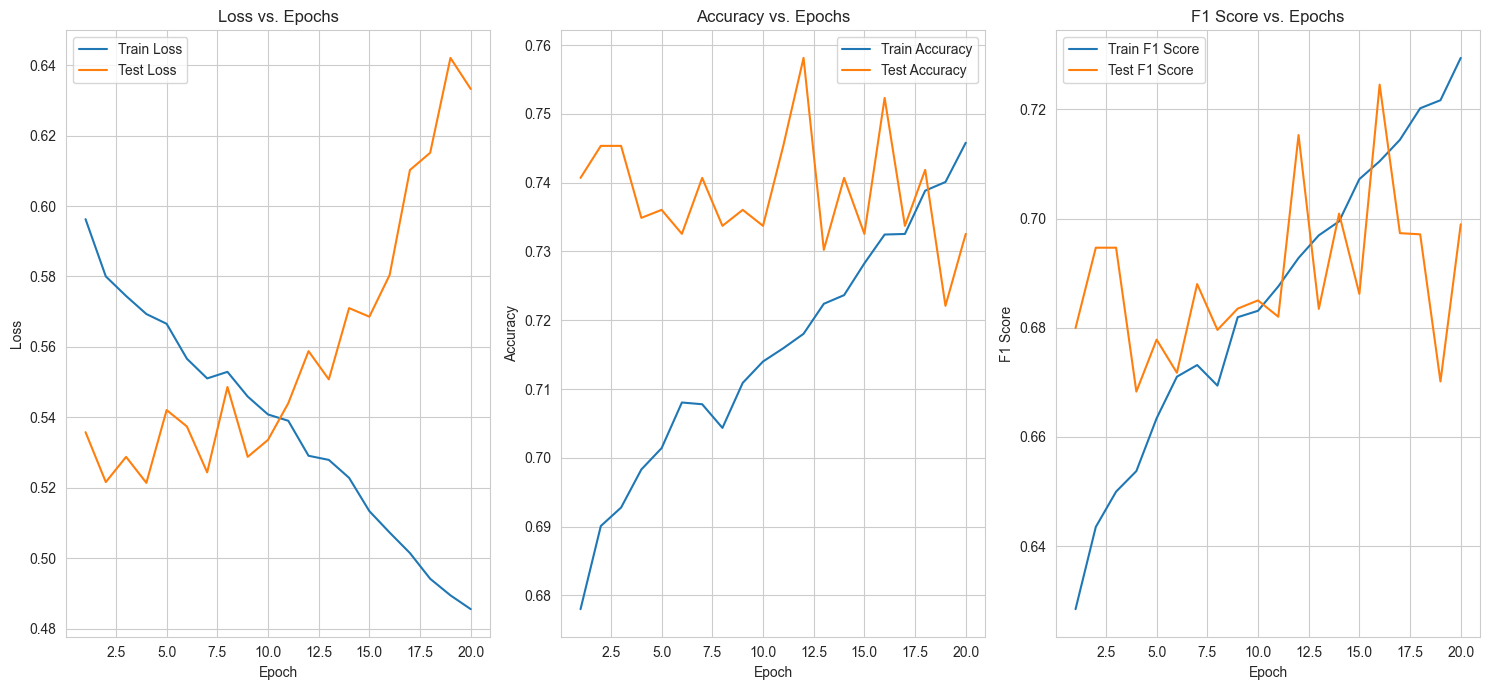

In [116]:
lstm_offensive = LSTMClassifier(20, 128, 2)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_offensive.parameters(), lr=0.01)


results, _ = train(
    lstm_offensive,
    optimizer, loss_function,
    train_dataloader=off_train_dataloader,
    test_dataloader=off_test_dataloader,
    epochs=20,
    save_path="models/lstm_offensive.pt",
    model_tag="LSTM_offensive"
    )
plot_learning_curve(results)

### **ZJAWISKO 3** - sentyment (ang. *sentiment*)

In [26]:
sent_train_dataloader, sent_test_dataloader = get_dataloaders("sentiment", batch_size=128)

100%|██████████| 96/96 [00:01<00:00, 64.50it/s]


Epoch [1/30]
🏋️TRAIN -- Loss: 359.489, Accuracy: 0.451, F1 Score: 0.411
🧪TEST -- Loss: 0.965, Accuracy: 0.469, F1 Score: 0.377


100%|██████████| 96/96 [00:01<00:00, 66.61it/s]


Epoch [2/30]
🏋️TRAIN -- Loss: 328.889, Accuracy: 0.543, F1 Score: 0.518
🧪TEST -- Loss: 0.877, Accuracy: 0.569, F1 Score: 0.559


100%|██████████| 96/96 [00:01<00:00, 60.88it/s]


Epoch [3/30]
🏋️TRAIN -- Loss: 319.253, Accuracy: 0.576, F1 Score: 0.558
🧪TEST -- Loss: 0.915, Accuracy: 0.560, F1 Score: 0.538


100%|██████████| 96/96 [00:01<00:00, 61.33it/s]


Epoch [4/30]
🏋️TRAIN -- Loss: 309.608, Accuracy: 0.587, F1 Score: 0.569
🧪TEST -- Loss: 0.837, Accuracy: 0.605, F1 Score: 0.599


100%|██████████| 96/96 [00:01<00:00, 49.46it/s]


Epoch [5/30]
🏋️TRAIN -- Loss: 302.421, Accuracy: 0.593, F1 Score: 0.578
🧪TEST -- Loss: 0.848, Accuracy: 0.602, F1 Score: 0.598


100%|██████████| 96/96 [00:01<00:00, 48.04it/s]


Epoch [6/30]
🏋️TRAIN -- Loss: 298.630, Accuracy: 0.601, F1 Score: 0.588
🧪TEST -- Loss: 0.817, Accuracy: 0.609, F1 Score: 0.606


100%|██████████| 96/96 [00:01<00:00, 53.20it/s]


Epoch [7/30]
🏋️TRAIN -- Loss: 296.258, Accuracy: 0.609, F1 Score: 0.596
🧪TEST -- Loss: 0.831, Accuracy: 0.599, F1 Score: 0.600


100%|██████████| 96/96 [00:01<00:00, 50.80it/s]


Epoch [8/30]
🏋️TRAIN -- Loss: 295.253, Accuracy: 0.609, F1 Score: 0.597
🧪TEST -- Loss: 0.812, Accuracy: 0.617, F1 Score: 0.617


100%|██████████| 96/96 [00:01<00:00, 51.03it/s]


Epoch [9/30]
🏋️TRAIN -- Loss: 293.293, Accuracy: 0.610, F1 Score: 0.599
🧪TEST -- Loss: 0.819, Accuracy: 0.603, F1 Score: 0.603


100%|██████████| 96/96 [00:02<00:00, 45.17it/s]


Epoch [10/30]
🏋️TRAIN -- Loss: 291.624, Accuracy: 0.616, F1 Score: 0.607
🧪TEST -- Loss: 0.789, Accuracy: 0.630, F1 Score: 0.622


100%|██████████| 96/96 [00:01<00:00, 48.43it/s]


Epoch [11/30]
🏋️TRAIN -- Loss: 288.773, Accuracy: 0.622, F1 Score: 0.613
🧪TEST -- Loss: 0.789, Accuracy: 0.629, F1 Score: 0.628


100%|██████████| 96/96 [00:01<00:00, 49.22it/s]


Epoch [12/30]
🏋️TRAIN -- Loss: 286.963, Accuracy: 0.623, F1 Score: 0.615
🧪TEST -- Loss: 0.804, Accuracy: 0.615, F1 Score: 0.609


100%|██████████| 96/96 [00:02<00:00, 45.76it/s]


Epoch [13/30]
🏋️TRAIN -- Loss: 285.852, Accuracy: 0.624, F1 Score: 0.616
🧪TEST -- Loss: 0.791, Accuracy: 0.626, F1 Score: 0.624


100%|██████████| 96/96 [00:01<00:00, 50.12it/s]


Epoch [14/30]
🏋️TRAIN -- Loss: 283.904, Accuracy: 0.631, F1 Score: 0.624
🧪TEST -- Loss: 0.836, Accuracy: 0.616, F1 Score: 0.610


100%|██████████| 96/96 [00:02<00:00, 46.06it/s]


Epoch [15/30]
🏋️TRAIN -- Loss: 281.674, Accuracy: 0.633, F1 Score: 0.626
🧪TEST -- Loss: 0.794, Accuracy: 0.631, F1 Score: 0.630


100%|██████████| 96/96 [00:02<00:00, 45.56it/s]


Epoch [16/30]
🏋️TRAIN -- Loss: 279.380, Accuracy: 0.637, F1 Score: 0.631
🧪TEST -- Loss: 0.806, Accuracy: 0.621, F1 Score: 0.621


100%|██████████| 96/96 [00:02<00:00, 43.84it/s]


Epoch [17/30]
🏋️TRAIN -- Loss: 277.475, Accuracy: 0.640, F1 Score: 0.634
🧪TEST -- Loss: 0.821, Accuracy: 0.611, F1 Score: 0.599


100%|██████████| 96/96 [00:02<00:00, 39.63it/s]


Epoch [18/30]
🏋️TRAIN -- Loss: 275.207, Accuracy: 0.643, F1 Score: 0.638
🧪TEST -- Loss: 0.797, Accuracy: 0.632, F1 Score: 0.630


100%|██████████| 96/96 [00:02<00:00, 37.88it/s]


Epoch [19/30]
🏋️TRAIN -- Loss: 273.671, Accuracy: 0.646, F1 Score: 0.641
🧪TEST -- Loss: 0.806, Accuracy: 0.620, F1 Score: 0.612


100%|██████████| 96/96 [00:02<00:00, 43.28it/s]
/Users/stefan/coding/pwr-ai/NNs/btc-price-pred/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [20/30]
🏋️TRAIN -- Loss: 270.435, Accuracy: 0.651, F1 Score: 0.647
🧪TEST -- Loss: 0.801, Accuracy: 0.628, F1 Score: 0.626


100%|██████████| 96/96 [00:01<00:00, 49.44it/s]


Epoch [21/30]
🏋️TRAIN -- Loss: 268.202, Accuracy: 0.655, F1 Score: 0.651
🧪TEST -- Loss: 0.833, Accuracy: 0.611, F1 Score: 0.607


100%|██████████| 96/96 [00:01<00:00, 50.50it/s]


Epoch [22/30]
🏋️TRAIN -- Loss: 264.278, Accuracy: 0.661, F1 Score: 0.658
🧪TEST -- Loss: 0.833, Accuracy: 0.621, F1 Score: 0.621


100%|██████████| 96/96 [00:01<00:00, 49.60it/s]


Epoch [23/30]
🏋️TRAIN -- Loss: 262.350, Accuracy: 0.663, F1 Score: 0.660
🧪TEST -- Loss: 0.856, Accuracy: 0.608, F1 Score: 0.607


100%|██████████| 96/96 [00:01<00:00, 52.16it/s]


Epoch [24/30]
🏋️TRAIN -- Loss: 257.544, Accuracy: 0.671, F1 Score: 0.668
🧪TEST -- Loss: 0.870, Accuracy: 0.603, F1 Score: 0.603


100%|██████████| 96/96 [00:01<00:00, 49.54it/s]


Epoch [25/30]
🏋️TRAIN -- Loss: 255.591, Accuracy: 0.675, F1 Score: 0.672
🧪TEST -- Loss: 0.858, Accuracy: 0.603, F1 Score: 0.603


100%|██████████| 96/96 [00:02<00:00, 47.24it/s]


Epoch [26/30]
🏋️TRAIN -- Loss: 251.512, Accuracy: 0.683, F1 Score: 0.681
🧪TEST -- Loss: 0.922, Accuracy: 0.592, F1 Score: 0.588


100%|██████████| 96/96 [00:01<00:00, 48.63it/s]


Epoch [27/30]
🏋️TRAIN -- Loss: 247.337, Accuracy: 0.690, F1 Score: 0.689
🧪TEST -- Loss: 0.869, Accuracy: 0.596, F1 Score: 0.596


100%|██████████| 96/96 [00:02<00:00, 45.73it/s]


Epoch [28/30]
🏋️TRAIN -- Loss: 244.742, Accuracy: 0.692, F1 Score: 0.691
🧪TEST -- Loss: 0.867, Accuracy: 0.600, F1 Score: 0.596


100%|██████████| 96/96 [00:01<00:00, 48.34it/s]


Epoch [29/30]
🏋️TRAIN -- Loss: 240.073, Accuracy: 0.700, F1 Score: 0.699
🧪TEST -- Loss: 0.930, Accuracy: 0.577, F1 Score: 0.578


100%|██████████| 96/96 [00:02<00:00, 47.80it/s]


Epoch [30/30]
🏋️TRAIN -- Loss: 235.095, Accuracy: 0.709, F1 Score: 0.708
🧪TEST -- Loss: 0.933, Accuracy: 0.595, F1 Score: 0.594
Best model saved to: models/lstm_sentiment_30ep.pt


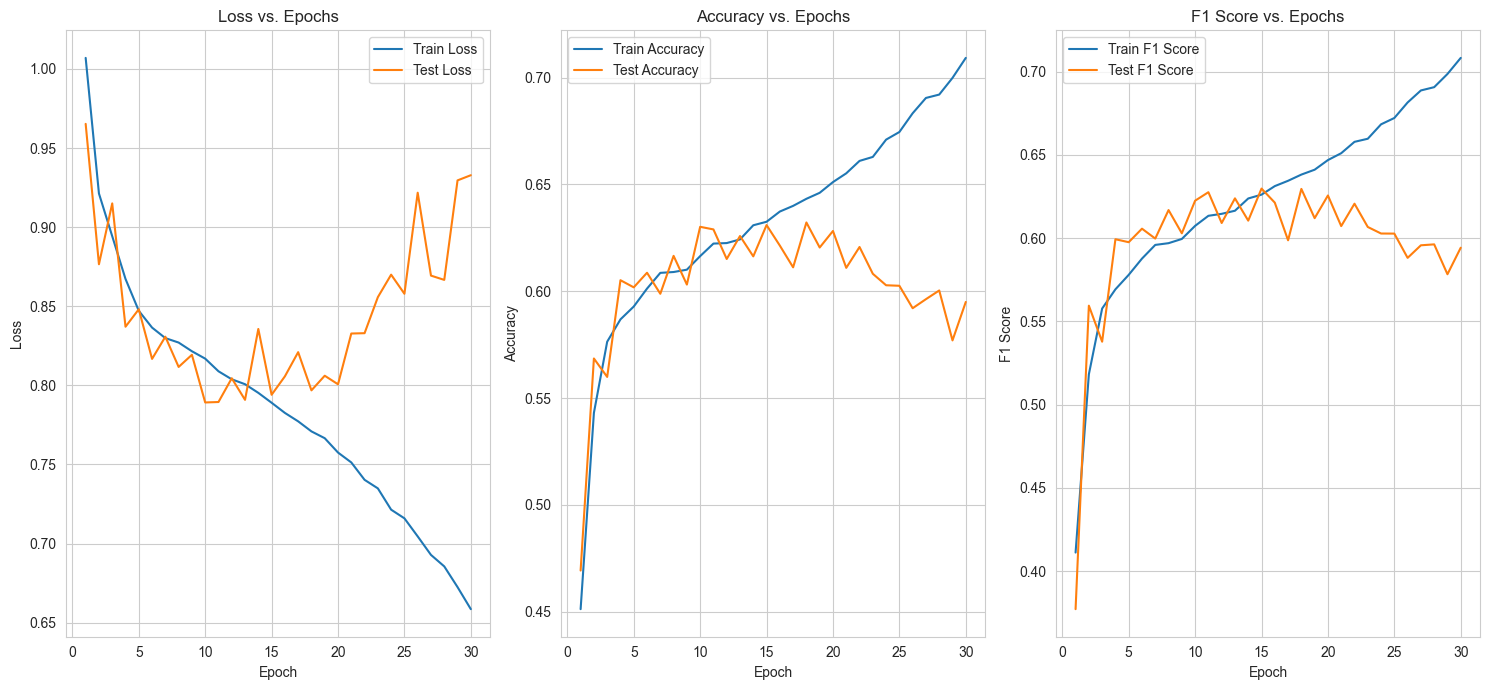

In [42]:
torch.manual_seed(420)
lstm_sentiment = LSTMClassifier(20, 64, 4)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_sentiment.parameters(), lr=0.001)


results_sent, _ = train(
    lstm_sentiment,
    optimizer, loss_function,
    train_dataloader=sent_train_dataloader,
    test_dataloader=sent_test_dataloader,
    epochs=30,
    save_path="models/lstm_sentiment_30ep.pt",
    model_tag="lstm_sentiment"
    )
plot_learning_curve(results_sent)

## Trenowanie modeli LR (fastText) dla ZJAWISKO_1 i ZJAWISKO_2 (2 pkt.)

In [117]:
!sed 's/^/__label__/g' tweeteval/datasets/offensive/train_labels.txt > data/train_labels_offensive.txt
!sed 's/^/__label__/g' tweeteval/datasets/offensive/test_labels.txt > data/test_labels_offensive.txt
!sed 's/^/__label__/g' tweeteval/datasets/offensive/val_labels.txt > data/val_labels_offensive.txt

In [119]:
!paste -d " " tweeteval/datasets/offensive/train_text.txt data/train_labels_offensive.txt > data/train_offensive.txt
!paste -d " " tweeteval/datasets/offensive/test_text.txt data/test_labels_offensive.txt > data/test_offensive.txt
!paste -d " " tweeteval/datasets/offensive/val_text.txt data/val_labels_offensive.txt > data/val_offensive.txt

In [122]:
!fasttext supervised -input data/train_offensive.txt -output offensive_model -dim 20 -pretrainedVectors models/fasttext_tweetmodel_btc_sg_20_en.vec -autotune-validation data/val_offensive.txt 

Progress:  81.8% Trials:   24 Best score:  0.766616 ETA:   0h 0m54s  1.3% Trials:    1 Best score:   unknown ETA:   0h 4m55s   1 Best score:   unknown ETA:   0h 4m52s2 Best score:  0.733384 ETA:   0h 4m44s9.7% Trials:    3 Best score:  0.742447 ETA:   0h 4m30s ETA:   0h 4m20s ETA:   0h 3m57s10 Best score:  0.764350 ETA:   0h 3m29s% Trials:   11 Best score:  0.764350 ETA:   0h 3m20s% Trials:   13 Best score:  0.764350 ETA:   0h 2m57s 0.764350 ETA:   0h 2m52s 0.764350 ETA:   0h 2m50s Trials:   14 Best score:  0.764350 ETA:   0h 2m49s  15 Best score:  0.764350 ETA:   0h 2m34s Trials:   16 Best score:  0.764350 ETA:   0h 2m30s Trials:   17 Best score:  0.764350 ETA:   0h 2m17s60.0% Trials:   19 Best score:  0.764350 ETA:   0h 2m 0s61.0% Trials:   19 Best score:  0.764350 ETA:   0h 1m57s0.764350 ETA:   0h 1m47s72.9% Trials:   22 Best score:  0.766616 ETA:   0h 1m21s% Trials:   24 Best score:  0.766616 ETA:   0h 1m 6s79.3% Trials:   24 Best score:  0.766616 ETA:   0h 1m 2s 80.3% Trials:   24

In [ ]:
!fasttext test models/offensive_model.bin data/test_offensive.txt

N	860
P@1	0.799
R@1	0.799


In [ ]:
!fasttext test-label models/offensive_model.bin data/test_offensive.txt

F1-Score : 0.870412  Precision : 0.812587  Recall : 0.937097   __label__0
F1-Score : 0.550649  Precision : 0.731034  Recall : 0.441667   __label__1
N	860
P@1	0.799
R@1	0.799


In [ ]:
print("F1:", get_f1(0.799, 0.799))

F1: 0.799


In [167]:
!fasttext predict models/offensive_model.bin tweeteval/datasets/offensive/test_text.txt | sed 's/**label**//g' > predictions2/offensive.txt

sed: 1: "s/**label**//g": RE error: repetition-operator operand invalid


In [160]:
!python tweeteval/evaluation_script.py --tweeteval_path tweeteval/datasets --predictions_path predictions2 --task offensive

Issues with task offensive: Found input variables with inconsistent numbers of samples: [860, 0]
------------------------------
TweetEval Score (offensive): -1


## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_1 (2 pkt.)

In [31]:
import torch
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm

def evaluate_lstm(lstm, dataloader, loss_fn):
    results = {
        "loss": 0, "acc": 0, "f1": 0, "precision": 0, "recall": 0
    }
    with torch.no_grad():
        epoch_loss = 0
        all_preds = []
        all_labels = []
        
        for X, y_true in dataloader:
            y_pred = lstm.forward(X)
            loss = loss_fn(y_pred, y_true)
            epoch_loss += loss.item()
            _, predicted = torch.max(y_pred, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_true.cpu().numpy())
        
        accuracy = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='weighted')
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        
        results['loss'] = epoch_loss / len(dataloader)
        results['acc'] = accuracy
        results['f1'] = f1
        results['precision'] = precision
        results['recall'] = recall
    
    return results

In [ ]:
lstm_emotions = LSTMClassifier(20, 64, 4)
lstm_emotions.load_state_dict(torch.load("models/lstm_emotions_2.pt"))
lstm_emotions.eval()
loss_function = nn.CrossEntropyLoss()

emo_results = evaluate_lstm(lstm_emotions, emo_test_dataloader, loss_function)

In [32]:
def print_evaluation_metrics_over_epochs(results, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print("-------------------------------")
    for key, value_list in results.items():
        print(f"  {key.capitalize()}: {value_list:.4f}")

In [149]:
print_evaluation_metrics_over_epochs(emo_results, model_name="LSTM_emotions")

Evaluation Metrics for LSTM_emotions:
-------------------------------
  Loss: 1.7473
  Acc: 0.4975
  F1: 0.4925
  Precision: 0.4914
  Recall: 0.4975


## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_2 (2 pkt.)

In [150]:
lstm_offensive = LSTMClassifier(20, 128, 2)
lstm_offensive.load_state_dict(torch.load("models/lstm_offensive.pt"))
lstm_offensive.eval()
loss_function = nn.CrossEntropyLoss()
off_results = evaluate_lstm(lstm_offensive, off_test_dataloader, loss_function)

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 47.28it/s]


In [151]:
print_evaluation_metrics_over_epochs(off_results, model_name="LSTM_offensive")

Evaluation Metrics for LSTM_offensive:
-------------------------------
  Loss: 0.6252
  Acc: 0.7349
  F1: 0.6991
  Precision: 0.7039
  Recall: 0.7349


## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_3

In [55]:
lstm_sentiment = LSTMClassifier(20, 64, 4)
lstm_sentiment.load_state_dict(torch.load("models/lstm_sentiment_30ep.pt"))
lstm_sentiment.eval()
loss_function = nn.CrossEntropyLoss()
sent_results = evaluate_lstm(lstm_sentiment, sent_test_dataloader, loss_function)
print_evaluation_metrics_over_epochs(sent_results, model_name="LSTM for Sentiment")

100%|██████████| 96/96 [00:01<00:00, 89.81it/s]

Evaluation Metrics for LSTM for Sentiment:
-------------------------------
  Loss: 0.9262
  Acc: 0.5936
  F1: 0.5929
  Precision: 0.5938
  Recall: 0.5936


In [50]:
# dodanie prefiksu __label__
!sed 's/^/__label__/g' tweeteval/datasets/sentiment/train_labels.txt > data/train_labels_sentiment.txt
!sed 's/^/__label__/g' tweeteval/datasets/sentiment/test_labels.txt > data/test_labels_sentiment.txt
!sed 's/^/__label__/g' tweeteval/datasets/sentiment/val_labels.txt > data/val_labels_sentiment.txt

In [51]:
# Przygotowanie zbioru uczącego, testowego i walidacyjnego w formacie `fastText`:
!paste -d " " tweeteval/datasets/sentiment/train_text.txt data/train_labels_sentiment.txt > data/train_sentiment.txt
!paste -d " " tweeteval/datasets/sentiment/test_text.txt data/test_labels_sentiment.txt > data/test_sentiment.txt
!paste -d " " tweeteval/datasets/sentiment/val_text.txt data/val_labels_sentiment.txt > data/val_sentiment.txt

In [53]:
# trenowanie
!fasttext supervised -input data/train_sentiment.txt -output models/sentiment_model -dim 20 -pretrainedVectors \
 models/fasttext_tweetmodel_btc_sg_20_en.vec -autotune-validation data/val_sentiment.txt 


Progress: 100.0% Trials:   24 Best score:  0.688000 ETA:   0h 0m 0s Trials:    3 Best score:  0.665500 ETA:   0h 4m32s Best score:  0.665500 ETA:   0h 4m31s Best score:  0.687000 ETA:   0h 4m28sm47s 0.687000 ETA:   0h 3m 7s Best score:  0.687000 ETA:   0h 2m54s 0.688000 ETA:   0h 1m59s Trials:   21 Best score:  0.688000 ETA:   0h 1m38s  21 Best score:  0.688000 ETA:   0h 1m37s80.5% Trials:   23 Best score:  0.688000 ETA:   0h 0m58s Trials:   23 Best score:  0.688000 ETA:   0h 0m56s 96.9% Trials:   24 Best score:  0.688000 ETA:   0h 0m 9s100.0% Trials:   24 Best score:  0.688000 ETA:   0h 0m 0s
Training again with best arguments
Read 0M words
Number of words:  106361
Number of labels: 3
Progress: 100.0% words/sec/thread:  381949 lr:  0.000000 avg.loss:  0.161904 ETA:   0h 0m 0s lr: -0.000003 avg.loss:  0.161904 ETA:   0h 0m 0s


In [54]:
# ewaluacja
!fasttext test models/sentiment_model.bin data/test_sentiment.txt

N	12284
P@1	0.59
R@1	0.59
